# GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ (ADVANCED FUNCTIONAL EDA)

"Advanced Functional EDA" terimi, veri analizi ve keşfi (Exploratory Data Analysis - EDA) süreçlerine odaklanan gelişmiş veya ileri düzeyde işlevsel teknikleri ifade edebilir. EDA, veri setinin özelliklerini anlamak, temel istatistiksel özellikleri incelemek ve veri setindeki desenleri keşfetmek için kullanılan bir dizi yöntem ve tekniktir.

"Advanced Functional EDA" terimi, genellikle daha karmaşık veri setleri veya analiz gerektiren durumlar için kullanılır. Bu, özellikle büyük veri setleri, çok değişkenli veri setleri veya karmaşık ilişkiler içeren veri setleri gibi durumları içerebilir. İleri düzey EDA teknikleri, veriyi daha derinlemesine incelemek ve anlamak için gelişmiş görselleştirme, istatistiksel analiz ve modelleme yöntemlerini içerebilir.

Bu terim genellikle veri bilimi, istatistik veya makine öğrenimi gibi alanlarda çalışan profesyoneller arasında kullanılır ve ileri düzeyde analiz gerektiren projelerde daha fazla bilgi elde etmeye yöneliktir. Ancak, terimin kullanımı belirli bir bağlam veya sektörde değişebilir.

Ele alınacak başlıklar;

- 1. Genel Resim
- 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
- 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
- 4. Hedef Değişken Analizi (Analysis of Target Variable)
- 5. Korelasyon Analizi (Analysis of Correlation)

# 1. Genel Resim

Bu kodlar, Titanic veri setini yükleyerek, temel istatistiksel bilgileri göstererek, eksik değer kontrolü yaparak ve veri setinin genel yapısı hakkında bilgi edinmenize yardımcı olur. Bu tür bir kod, veri setini anlamak ve veri temizleme işlemlerine başlamak için başlangıç noktası olarak kullanılabilir.

In [1]:
# Gerekli kütüphaneleri import et
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas'ın DataFrame'ine gösterilecek sütun ve satır sayısı sınırlarını ayarla
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Titanic veri setini yükle
df = sns.load_dataset("titanic")

# Veri setinin ilk 5 satırını görüntüle
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Veri setinin son 5 satırını görüntüle
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [3]:
# Veri setinin satır ve sütun sayısını görüntüle
df.shape

(891, 15)

In [4]:
# Veri setinin genel bilgilerini görüntüle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Veri setinin sütun adlarını görüntüle
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], dtype='object')

In [6]:
# Veri setinin index bilgisini görüntüle
df.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
# Veri setinin temel istatistiksel bilgilerini görüntüle (örneğin, ortalama, standart sapma)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# Veri setinde eksik değer olup olmadığını kontrol et
df.isnull().values.any()

True

In [9]:
# Her bir sütundaki eksik değer sayısını görüntüle
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Bu fonksiyon, bir DataFrame'in temel istatistikleri ve yapısı hakkında bilgi sağlamak amacıyla kullanılır. DataFrame'in temel bilgilerini ekrana yazdırarak veri setini daha iyi anlamak için kullanışlı bir araçtır. İlk olarak, **DataFrame'in şekli, değişken türleri, ilk ve son satırları, boş değer sayıları ve temel istatistikler (ortalama, standart sapma, min, max, quantile'lar) görüntülenir**. Bu, veri setinin genel yapısı ve içeriği hakkında hızlı bir gözden geçirme sağlar.

In [10]:
def check_df(dataframe, head=5):
    # DataFrame'in şeklini (satır ve sütun sayısı) ekrana yazdır
    print("##################### Shape #####################")
    print(dataframe.shape)
    
    # DataFrame'deki değişkenlerin türlerini ekrana yazdır
    print("##################### Types #####################")
    print(dataframe.dtypes)
    
    # DataFrame'in ilk 'head' satırını ekrana yazdır
    print("##################### Head #####################")
    print(dataframe.head(head))
    
    # DataFrame'in son 'head' satırını ekrana yazdır
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    
    # DataFrame'deki her bir değişkenin içerdiği boş değer sayısını ekrana yazdır
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    
    # DataFrame'in temel istatistiklerini (ortalama, standart sapma, min, max, quantile'lar) ekrana yazdır
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


# check_df fonksiyonunu kullanarak DataFrame'in bilgilerini ekrana yazdır
check_df(df)

##################### Shape #####################
(891, 15)
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  

In [11]:
# flights veri seti ile aynı işlemi gerçekleştirelim
df = sns.load_dataset("flights")
check_df(df)

##################### Shape #####################
(144, 3)
##################### Types #####################
year             int64
month         category
passengers       int64
dtype: object
##################### Head #####################
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
##################### Tail #####################
     year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432
##################### NA #####################
year          0
month         0
passengers    0
dtype: int64
##################### Quantiles #####################
            count         mean         std     min      0%      5%     50%      95%      99%    100%     max
year        144.0  1954.500000    3.464102  1949.0  1949.0  1949.0  1954.5  1960.00  1960.00  1960.0  1960.0
passen

## 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
df = sns.load_dataset("titanic")

# İlk beş gözlemi göster
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# "survived" sütunundaki unique değerlerin sayısını ve frekanslarını göster
survived_counts = df["survived"].value_counts()
print(survived_counts)

survived
0    549
1    342
Name: count, dtype: int64


In [14]:
# "sex" sütunundaki unique (benzersiz) değerleri göster
sex_unique_values = df["sex"].unique()
print(sex_unique_values)

['male' 'female']


In [15]:
# "class" sütunundaki unique (number unique) değerlerin sayısını göster
class_unique_count = df["class"].nunique()
print(class_unique_count)

3


In [16]:
# Kategorik sütunları belirle
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

# Sayısal, ancak aslında kategorik olan sütunları belirle
# Eğer değişken tipi int veya float ise ve unique (eşsiz) sınıf sayısı 10 dan küçükse 
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

# Çok sayıda farklı değeri olan kategorik sütunları belirle
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

# Tüm kategorik sütunları birleştir
cat_cols = cat_cols + num_but_cat

# Çok sayıda farklı değeri olan kategorik sütunları çıkar
cat_cols = [col for col in cat_cols if col not in cat_but_car]

# Her bir kategorik sütundaki unique değer sayısını göster
cat_cols_unique_counts = df[cat_cols].nunique()
print(cat_cols_unique_counts)

# Kategorik olmayan sütunları belirle
non_cat_cols = [col for col in df.columns if col not in cat_cols]
print(non_cat_cols)

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
dtype: int64
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [17]:
# "survived" sütunundaki unique değerlerin yüzdelik dilimini göster
survived_percentage = 100 * df["survived"].value_counts() / len(df)
print(survived_percentage)

survived
0    61.616162
1    38.383838
Name: count, dtype: float64


Bu fonksiyon, kategorik değişkenlerin özetini görüntülemek için kullanılır. İlk olarak, belirtilen kategorik sütunun unique değerlerini ve bu değerlerin veri setindeki frekanslarını içeren bir DataFrame oluşturulur. Ardından, her bir değerin toplam veri setine oranı yüzde cinsinden hesaplanır. Fonksiyon, bu bilgileri ekrana yazdırır ve ardından bir ayracı görüntüler. Her bir özet arasında ayracı görüntülemek, bilgileri daha okunabilir hale getirir.

In [18]:
def cat_summary(dataframe, col_name):
    # Belirtilen kategorik sütunun unique değerlerini ve frekanslarını içeren DataFrame'i oluştur
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    
     # DataFrame'i ekrana yazdır
    print(summary_df)
    
    # Ayracı görüntüle
    print("##########################################")
    

In [19]:
# "sex" sütununun özetini görüntüle
cat_summary(df, "sex")

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################


In [20]:
# Tüm kategorik sütunların özetini görüntüle
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################
          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
##########################################
        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
            adult_male     Ratio
adult_male                      
True               537  60.26936
False              354  39.73064
##########################################
      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G       

Bu fonksiyon, önceki **`cat_summary`** fonksiyonunu genişleterek, isteğe bağlı olarak bir kategorik değişkenin frekans dağılımını görselleştirmek için Seaborn kütüphanesini kullanma özelliği ekler. Eğer **`plot=True`** olarak belirtilmişse, kategorik değişkenin frekans dağılımını bir çubuk grafiği ile gösterir. Veri setindeki kategorik değişkenlere daha kapsamlı bir bakış sağlar.

In [21]:
def cat_summary(dataframe, col_name, plot=False):
    # Belirtilen kategorik sütunun unique değerlerini ve frekanslarını içeren DataFrame'i oluştur
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    
    # DataFrame'i ekrana yazdır
    print(summary_df)
    
    # Ayracı görüntüle
    print("##########################################")

    # Eğer plot=True olarak belirtilmişse, kategorik değişkenin frekans dağılımını çubuk grafiği ile göster
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################


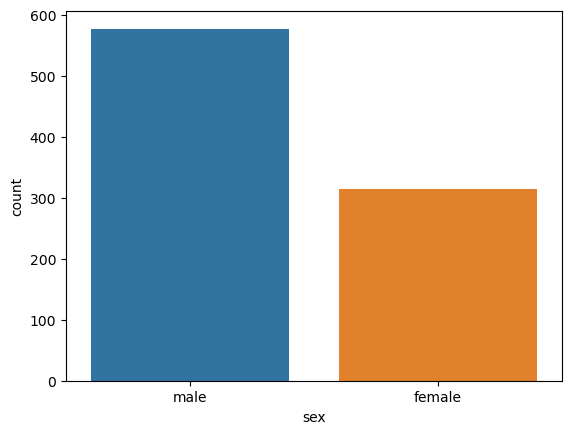

In [22]:
# "sex" sütununun özetini ve frekans dağılımını çubuk grafiği ile görüntüle
cat_summary(df, "sex", plot=True)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################


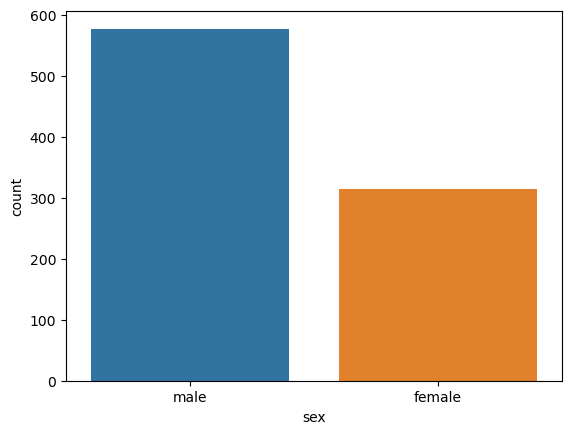

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
##########################################


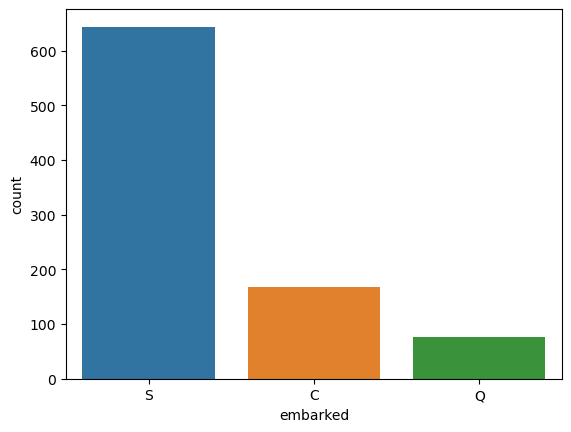

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


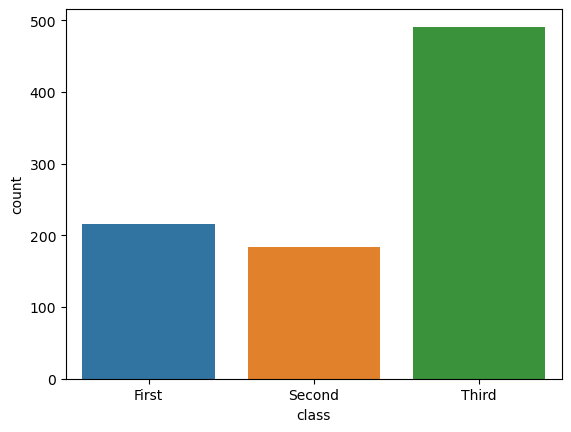

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


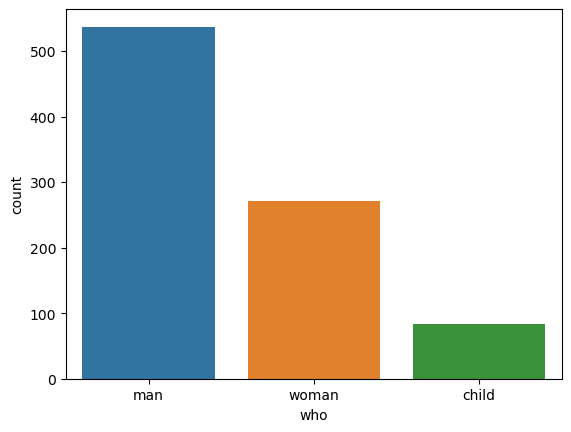

            adult_male     Ratio
adult_male                      
1                  537  60.26936
0                  354  39.73064
##########################################


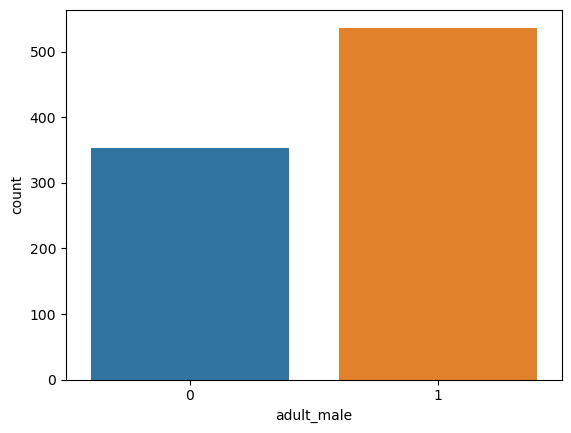

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
##########################################


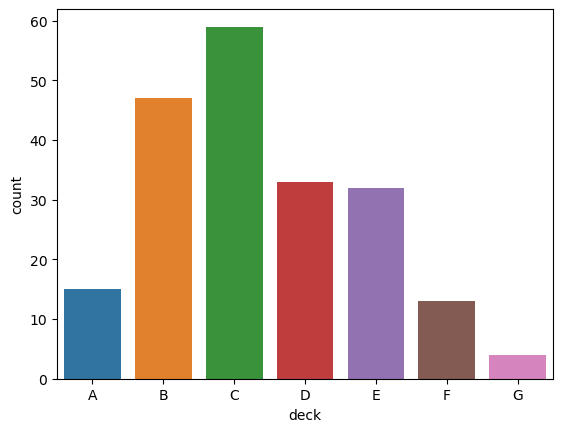

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


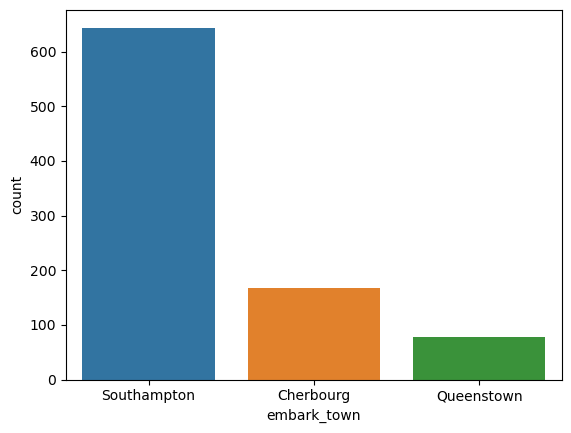

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838
##########################################


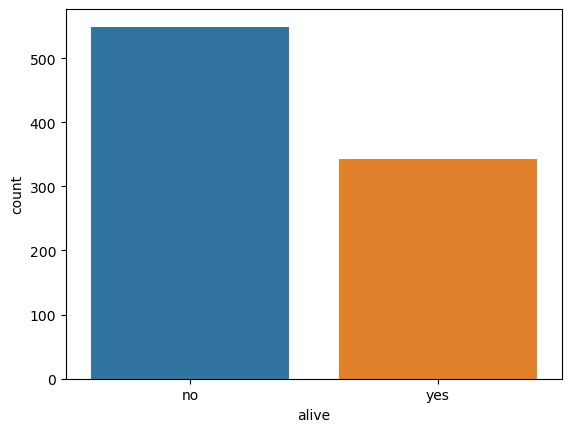

       alone     Ratio
alone                 
1        537  60.26936
0        354  39.73064
##########################################


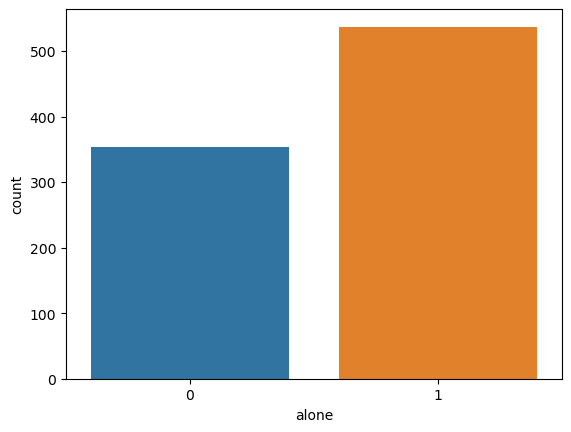

In [23]:
# Tüm kategorik sütunların özetini ve frekans dağılımlarını çubuk grafiği ile görüntüle
for col in cat_cols:
    # Grafiği çizdirmek için değişkenin tipi "bool" ise bunu "int" olarak değiştirdik
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)
    else:
        cat_summary(df, col, plot=True)

Bu fonksiyon, **`cat_summary`** fonksiyonunu güncelledik. Bu güncellenmiş fonksiyon, belirli bir kategorik sütunun veri tipini kontrol eder.

Eğer sütunun veri tipi "bool" ise sütunu integer'a dönüştürme işlemi ekler. Ardından, önceki fonksiyon gibi frekans tablosunu ve isteğe bağlı olarak çubuk grafiğini gösterir.

In [24]:
def cat_summary(dataframe, col_name, plot=False):
    # Eğer kategorik sütunun veri tipi "bool" ise, sütunu integer'a dönüştür
    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

    # Belirtilen kategorik sütunun unique değerlerini ve frekanslarını içeren DataFrame'i oluştur
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})

    # DataFrame'i ekrana yazdır
    print(summary_df)

    # Ayracı görüntüle
    print("##########################################")

    # Eğer plot=True olarak belirtilmişse, kategorik değişkenin frekans dağılımını çubuk grafiği ile göster
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

            adult_male     Ratio
adult_male                      
1                  537  60.26936
0                  354  39.73064
##########################################


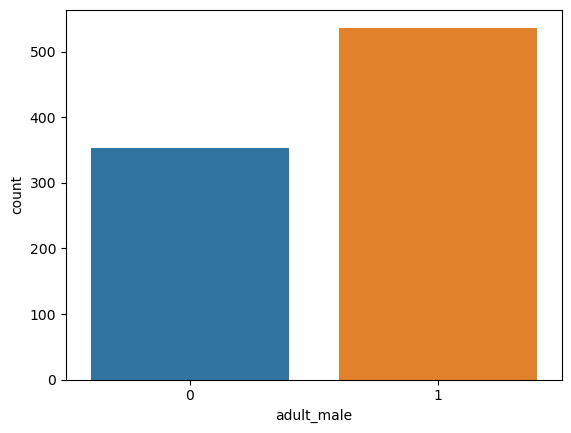

In [25]:
# "adult_male" sütununun özetini ve frekans dağılımını çubuk grafiği ile görüntüle
cat_summary(df, "adult_male", plot=True)

Bu fonksiyon, belirtilen kategorik sütunun unique değerlerini ve bu değerlere ait frekanslarını içeren bir DataFrame oluşturur. Oluşturulan bu DataFrame'i ekrana yazdırır ve daha sonra bir ayracı görüntüler. Bu şekilde, "sex" sütununun içerdiği unique değerleri ve bu değerlere ait frekansları görebilirsiniz.

In [26]:
def cat_summary(dataframe, col_name):
    # Belirtilen kategorik sütunun unique değerlerini ve frekanslarını içeren DataFrame'i oluştur
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})

    # DataFrame'i ekrana yazdır
    print(summary_df)

    # Ayracı görüntüle
    print("##########################################")

In [27]:
# "sex" sütununun özetini ekrana yazdır
cat_summary(df, "sex")

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################


## 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)

Bu kod bloğu, Titanic veri setindeki kategorik, numerik ve belirli bir eşik değerine sahip olan sütunları belirler. Kategorik sütunlar, "category", "object", ve "bool" tipinde olanlar olarak kabul edilir. Numerik sütunlar içindeki unique değer sayısı 10'dan az olanlar ve veri tipi "int" veya "float" olanlar alınır. Aynı zamanda unique değer sayısı 20'den fazla olan sütunlar, "cat_but_car" listesine eklenir, ancak "cat_cols" listesine eklenmez.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Titanic veri setini yükle
df = sns.load_dataset("titanic")
df.head()

# Kategorik sütunları, 10'dan az unique değeri olan numerik sütunları ve 20'den fazla unique değeri olan kategorik sütunları belirle
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

# Numerik sütunları seç
num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
num_cols = [col for col in num_cols if col not in cat_cols]

Bu kod bloğu, belirtilen numerik sütunun istatistik özetini yazdırmak için num_summary fonksiyonunu ve bu fonksiyonu kullanarak tüm numerik sütunların istatistik özetlerini yazdırmak için bir döngüyü içerir.

In [29]:
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    # İlgili numerik sütunun istatistik özetini yazdır
    print(dataframe[numerical_col].describe(quantiles).T)

# 'age' sütununun istatistik özetini yazdır
num_summary(df, "age")

# Numerik sütunların istatistik özetlerini yazdır
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%     

Bu kod bloğu, belirtilen numerik sütunun istatistik özetini yazdırmak ve istenirse histogramını çizmek için num_summary fonksiyonunu içerir. Daha sonra, bu fonksiyonu kullanarak tüm numerik sütunların istatistik özetlerini ve histogramlarını çizer.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


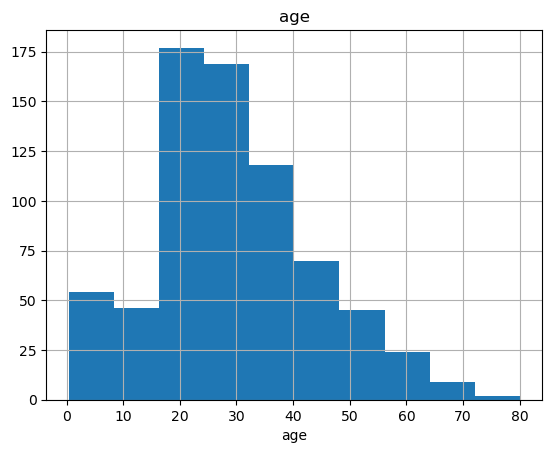

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


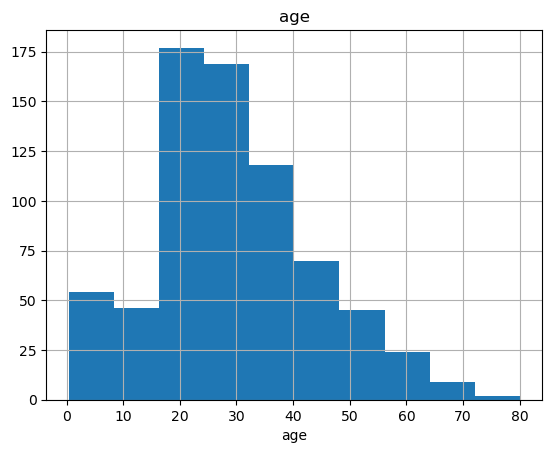

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


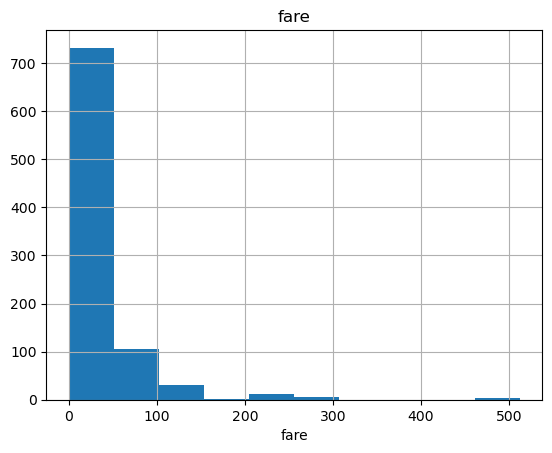

In [30]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    
    # İlgili numerik sütunun istatistik özetini yazdır
    print(dataframe[numerical_col].describe(quantiles).T)

    # Eğer 'plot' True ise, histogramı çiz ve göster
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

# 'age' sütununun istatistik özetini yazdır ve histogramını çiz
num_summary(df, "age", plot=True)

# Numerik sütunların istatistik özetlerini yazdır ve histogramlarını çiz
for col in num_cols:
    num_summary(df, col, plot=True)

## Değişkenlerin Yakalanması ve İşlemlerin Genelleştirilmesi

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas ve Seaborn kütüphanelerini kullanarak Titanic veri setini yükle
df = sns.load_dataset("titanic")

# Veri setinin ilk 5 gözlemini göster
df.head()

# Veri setinin genel bilgilerini göster
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # Kategorik değişkenler ve numerik fakat kategorik olan değişkenleri belirle
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]

    # Kategorik görünümlü kardinal değişkenleri belirle
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    # Kategorik değişkenler listesine numerik fakat kategorik olan değişkenleri ekle
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerik değişkenleri belirle
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    # Veri setinin boyutu ve değişken türleri hakkında bilgi ver
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

# Veri setindeki değişken isimlerini ve türlerini çıkar
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_cat: 0


In [33]:
def cat_summary(dataframe, col_name):
    """
    Kategorik değişken için özet istatistiklere göz atın.

    Parameters
    ----------
    dataframe: dataframe
        İstatistikleri alınacak dataframe.
    col_name: str
        İstatistikleri çıkarılacak kategorik değişkenin adı.

    Returns
    -------
    None
    """
    # Değişkenin sınıf frekansları ve oranları
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

# Örnek olarak "sex" değişkeni için istatistiklere göz at
cat_summary(df, "sex")

# Diğer kategorik değişkenler için istatistiklere göz at
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################
        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################
          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
##########################################
        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
            adult_male     Ratio
adult_male                      
True               537  60.26936
False              354  39.73064
##########################################
      deck     Ratio
deck                

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


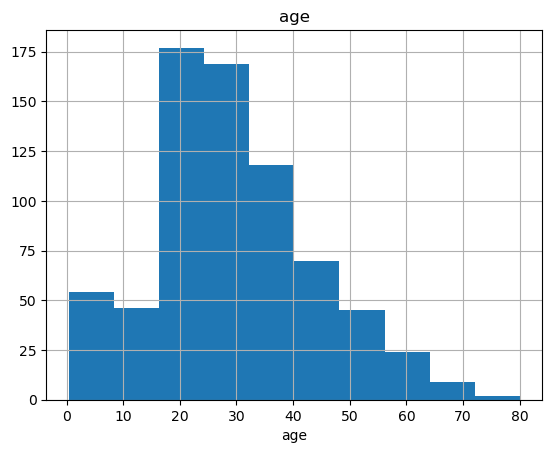

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


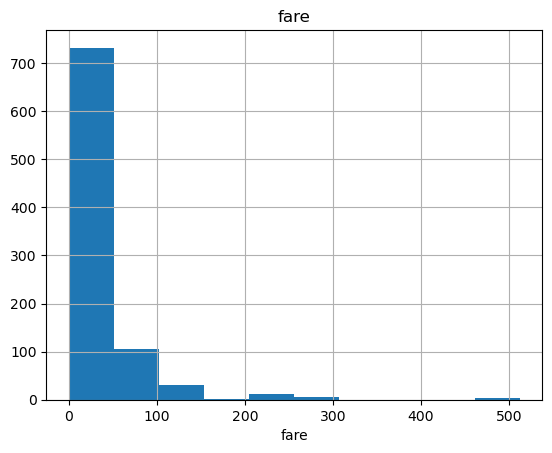

In [34]:
def num_summary(dataframe, numerical_col, plot=False):
    """
    Numerik değişken için özet istatistiklere ve histograma göz atın.

    Parameters
    ----------
    dataframe: dataframe
        İstatistikleri alınacak dataframe.
    numerical_col: str
        İstatistikleri çıkarılacak numerik değişkenin adı.
    plot: bool, optional
        Histogramı görselleştirmek için kullanılır. Varsayılan olarak False.

    Returns
    -------
    None
    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    # İstatistiklerin gösterilmesi
    print(dataframe[numerical_col].describe(quantiles).T)

    # Histogram çizimi
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

# Tüm numerik değişkenler için özet istatistiklere ve histogramlara göz at
for col in num_cols:
    num_summary(df, col, plot=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_

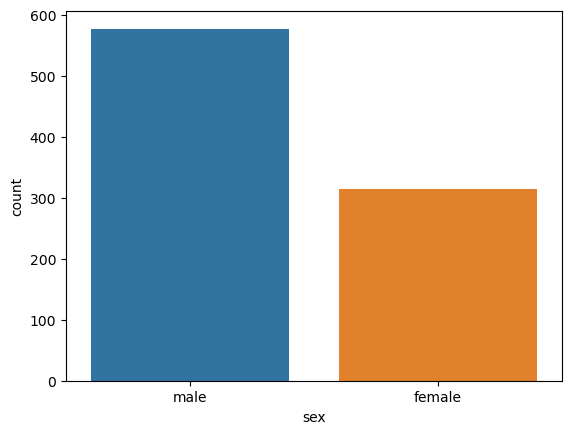

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
##########################################


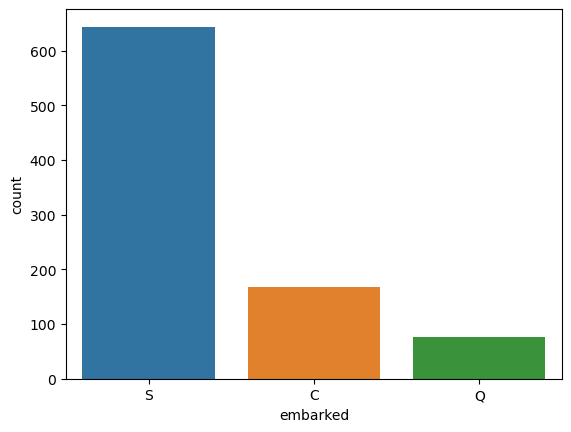

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


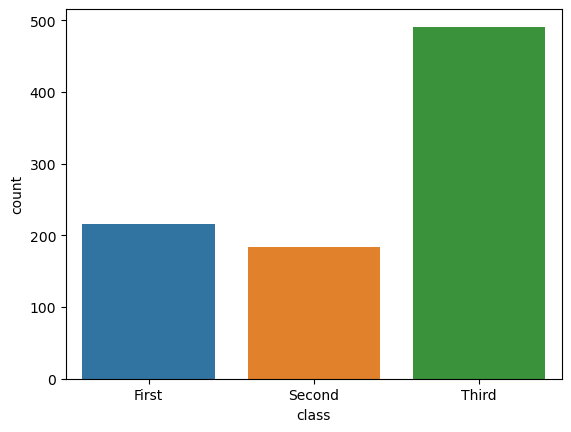

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


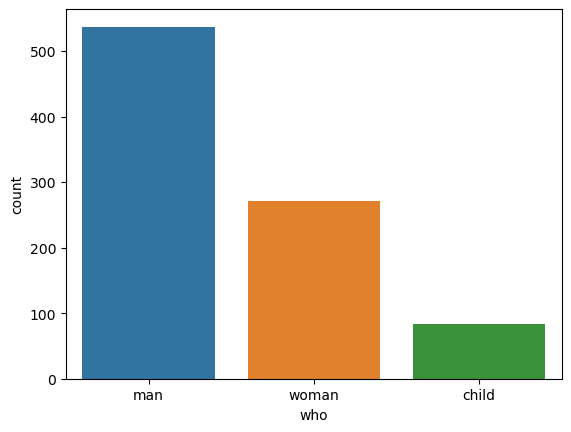

      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
##########################################


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


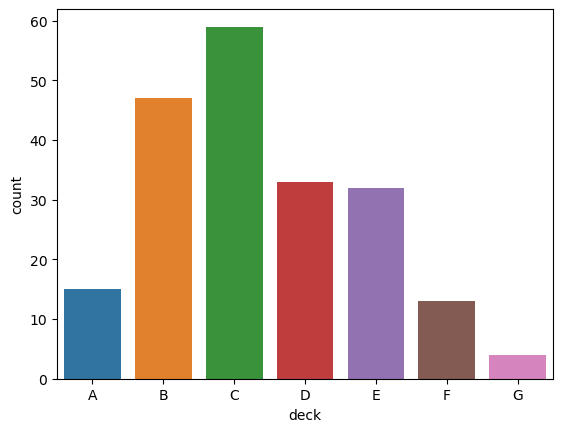

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


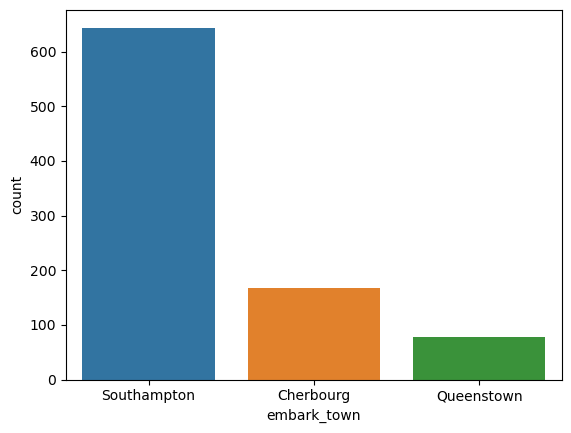

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838
##########################################


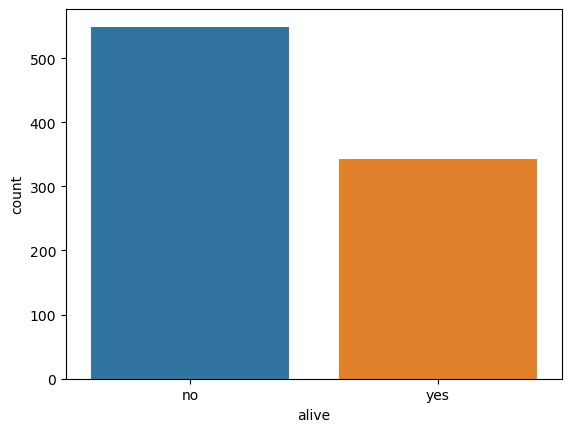

            adult_male     Ratio
adult_male                      
1                  537  60.26936
0                  354  39.73064
##########################################


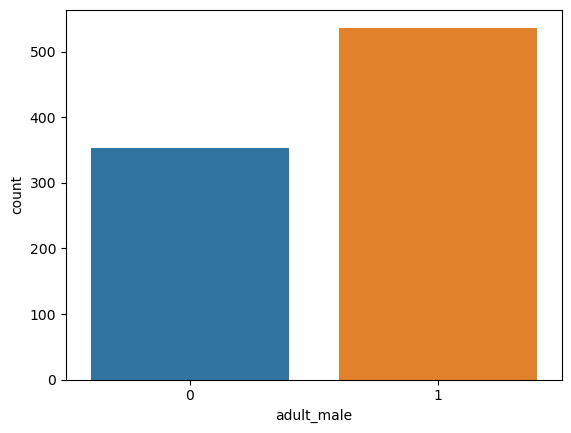

       alone     Ratio
alone                 
1        537  60.26936
0        354  39.73064
##########################################


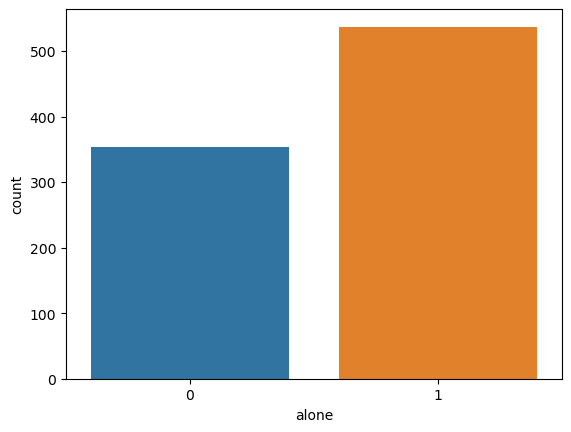

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


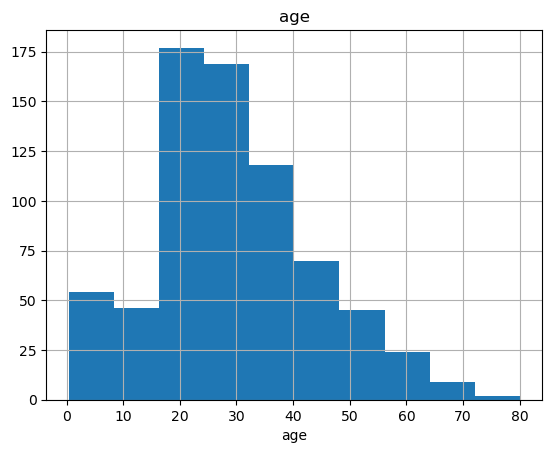

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


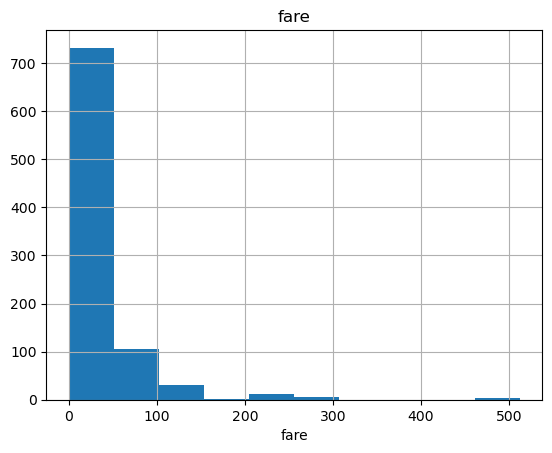

In [35]:
# BONUS
df = sns.load_dataset("titanic")
df.info()

# bool tipindeki değişkenleri int tipine dönüştürme
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

# Kategorik, numerik ve kategorik görünümlü kardinal değişkenleri belirleme
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Kategorik değişkenler için özet istatistiklere ve grafiklere göz atma
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

# Tüm kategorik değişkenler için özet istatistiklere ve grafiklere göz atma
for col in cat_cols:
    cat_summary(df, col, plot=True)

# Tüm numerik değişkenler için özet istatistiklere ve histogramlara göz atma
for col in num_cols:
    num_summary(df, col, plot=True)

## 4. Hedef Değişken Analizi (Analysis of Target Variable)

Bu kod bloğu, Titanic veri setinde bulunan bool tipindeki değişkenleri int tipine dönüştürür ve ardından kategorik değişkenlerin özet istatistiklerini ve grafiklerini oluşturan bir fonksiyon içerir. Bu fonksiyon, isteğe bağlı olarak grafik çizimini kontrol edebilir.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame'i gösterim ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Titanic veri setini yükleme
df = sns.load_dataset("titanic")

# bool tipindeki değişkenleri int tipine dönüştürme
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

# Kategorik değişkenler için özet istatistiklere ve grafiklere göz atma
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [37]:
# Fonksiyon, veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini döndürür.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Parameters
    ----------
    dataframe: dataframe
        İsimleri alınmak istenen dataframe.
    cat_th: int, float
        Numerik fakat kategorik olan değişkenler için sınıf eşik değeri.
    car_th: int, float
        Kategorik fakat kardinal değişkenler için sınıf eşik değeri.

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi.
    num_cols: list
        Numerik değişken listesi.
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi.

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı.
    num_but_cat cat_cols'un içerisinde.

    """
    # Kategorik değişkenleri ve kategorik görünümlü kardinal değişkenleri belirleme
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
    
    # Kategorik değişkenler ve numerik fakat kategorik olanlar için filtreleme
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerik değişkenleri belirleme
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    # Bilgi ve istatistiklerin yazdırılması
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [38]:
# Veri setindeki değişken türlerini belirleme
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_cat: 2


In [39]:
# Veri setinin başını gösterme
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [40]:
# "survived" değişkeninin sınıf dağılımını ve oranını inceleme
df["survived"].value_counts()
cat_summary(df, "survived")

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838
##########################################


## Hedef Değişkenin Kategorik Değişkenler ile Analizi

Bu kod bloğu, belirtilen kategorik değişkenlerin "survived" hedef değişkeni üzerindeki etkisini incelemek için kullanılır. İlk olarak, belirtilen kategorik değişkenlerin "survived" hedef değişkeni üzerindeki ortalamasını gruplayarak hesaplar.

In [41]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Bu satır, "sex" değişkenine göre gruplayarak "survived" hedef değişkeninin ortalama değerlerini gösterir. Ardından, bu işlemi genelleştiren bir fonksiyon olan target_summary_with_cat fonksiyonu tanımlanır. Bu fonksiyon, belirtilen kategorik değişkenin "survived" hedef değişkeni üzerindeki etkisini incelemek için kullanılır.

In [42]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

# Örnek kullanım
target_summary_with_cat(df, "survived", "pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363




Ardından, bu fonksiyon kullanılarak tüm kategorik değişkenlerin "survived" hedef değişkeni üzerindeki etkileri incelenir.

In [43]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957


        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363


       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458


      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000


             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957


       TARGET_MEAN
alive             
no             0.0
yes            1.0


            TARGET_MEAN
adult_male             
0              0.717514
1              0.163873


       TARGET_MEAN
alone             
0         0.505650
1         0.303538




C:\Users\Administrator\AppData\Local\Temp\ipykernel_7844\2403589770.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7844\2403589770.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


## Hedef Değişkenin Sayısal Değişkenler ile Analizi

Bu kod bloğu, belirtilen sayısal değişkenlerin "survived" hedef değişkeni üzerindeki etkisini incelemek için kullanılır. İlk olarak, "age" değişkeninin "survived" hedef değişkeni üzerindeki ortalamasını gruplayarak hesaplamak için aşağıdaki satırları kullanabilirsiniz:

In [44]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

Alternatif olarak, agg fonksiyonunu kullanarak tüm sayısal değişkenlerin "survived" hedef değişkeni üzerindeki etkilerini inceleyen bir fonksiyon olan target_summary_with_num fonksiyonu tanımlanır.

In [45]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# Örnek kullanım
target_summary_with_num(df, "survived", "age")


                age
survived           
0         30.626179
1         28.343690




Ardından, bu fonksiyon kullanılarak tüm sayısal değişkenlerin "survived" hedef değişkeni üzerindeki etkileri incelenir.

In [46]:
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




## 5. Korelasyon Analizi (Analysis of Correlation)

Bu kod bloğu, meme kanseri veri setindeki sayısal değişkenler arasındaki korelasyonu görselleştirmek için kullanılır. İşte bu kodun adım adım açıklamaları:

İlk olarak, gerekli kütüphaneler (NumPy, Pandas, Seaborn ve Matplotlib) import edilir.

Genellikle veri setlerinde, aralarında çok yüksek korelasyon bulunan değişkenlerin olmamasını isteriz. Çünkü ikisi de aynı şeyi ifade eder. Birinin artması diğerinin de artması demektir. Neredeyse aynı değişken olduğunu gösterir.

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"breast_cancer.csv" dosyası okunur ve gereksiz sütunlar atılarak veri seti hazırlanır.

In [48]:
df = pd.read_csv("datasets/breast_cancer.csv")
df = df.iloc[:, 1:-1]

Veri setinin ilk beş gözlemini görmek için head() fonksiyonu kullanılır.

In [49]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Sayısal değişkenleri belirlemek için dtype özelliğini kullanarak bir sayısal sütun listesi oluşturulur.

In [50]:
num_cols = [col for col in df.columns if df[col].dtype in [int, float]]

Korelasyon matrisi hesaplanır.

In [51]:
corr = df[num_cols].corr()

Seaborn kütüphanesinin **heatmap** fonksiyonu kullanılarak korelasyon matrisi görselleştirilir.

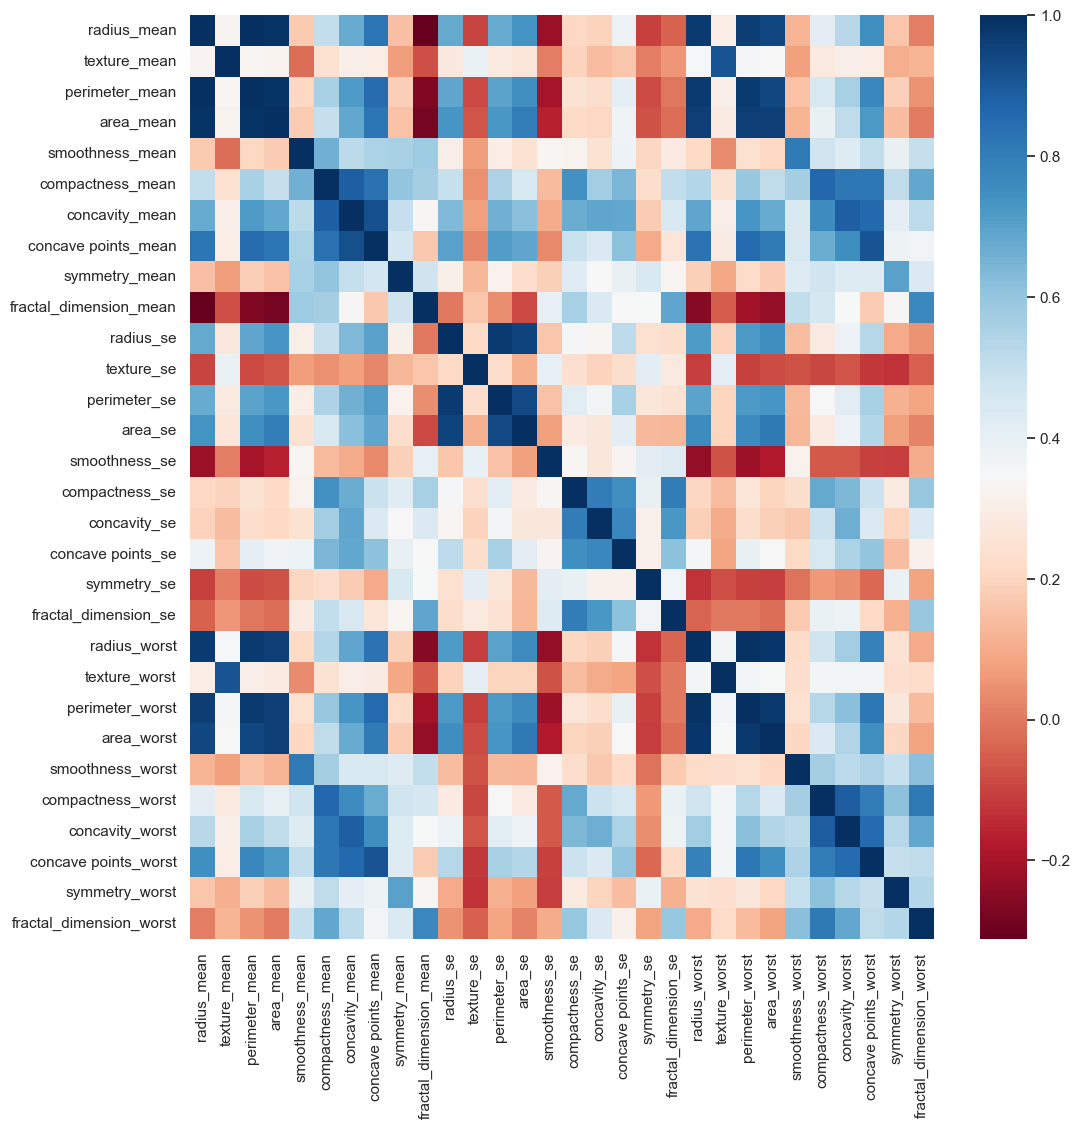

In [52]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

## Yüksek Korelasyonlu Değişkenlerin Silinmesi

Bu veri analizi kodu, bir veri setindeki yüksek korelasyona sahip özellikleri tespit etmeyi ve bu özellikleri düşürmeyi amaçlamaktadır.

Bu kod, bir veri setindeki özellikler arasındaki korelasyonu analiz etmeyi ve yüksek korelasyona sahip sütunları tespit etmeyi amaçlar. Fonksiyonlar aracılığıyla bu işlemleri modüler hale getirir ve isteğe bağlı olarak ısı haritası çizimi gibi görselleştirmeler ekler. Ayrıca, büyük bir veri setinde bu analizi nasıl gerçekleştireceğinizi gösterir ve 'adsa' değişkeninin tipini kontrol eder. Ancak, 'adsa' değişkeni bu kod içinde tanımlanmamıştır, bu nedenle bu bölüm hata verecektir

In [53]:
import pandas as pd
import numpy as np

# Sayısal olmayan sütunları çıkart
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla ve mutlak değerlerini al
cor_matrix = numeric_df.corr().abs()

# Korelasyon matrisini ekrana yazdır
print(cor_matrix)

                         radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
radius_mean                 1.000000      0.323782        0.997855   0.987357         0.170581          0.506124        0.676764             0.822529       0.147741                0.311631   0.679090    0.097317      0.674172  0.735864       0.222600        0.206000      0.194204           0.376169     0.104321              0.042641      0.969539       0.297008         0.965137    0.941082          0.119616           0.413463         0.526911              0.744214        0.163953   
texture_mean            

In [54]:
# Üst üçgeni NaN yap ve yüksek korelasyona sahip sütunları bul
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > 0.90)]
print(cor_matrix[drop_list])

                         perimeter_mean  area_mean  concave points_mean  perimeter_se   area_se  radius_worst  texture_worst  perimeter_worst  area_worst  concave points_worst
radius_mean                    0.997855   0.987357             0.822529      0.674172  0.735864      0.969539       0.297008         0.965137    0.941082              0.744214
texture_mean                   0.329533   0.321086             0.293464      0.281673  0.259845      0.352573       0.912045         0.358040    0.343546              0.295316
perimeter_mean                 1.000000   0.986507             0.850977      0.693135  0.744983      0.969476       0.303038         0.970387    0.941550              0.771241
area_mean                      0.986507   1.000000             0.823269      0.726628  0.800086      0.962746       0.287489         0.959120    0.959213              0.722017
smoothness_mean                0.207278   0.177028             0.553695      0.296092  0.246552      0.213120       0.03

In [55]:
# DataFrame'den yüksek korelasyona sahip sütunları düşür
df.drop(drop_list, axis=1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [56]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    """
    Yüksek korelasyona sahip sütunları tespit et ve isteğe bağlı olarak ısı haritası çizdir.
    """
    # Sayısal olmayan sütunları sayısal forma dönüştür
    dataframe_numeric = dataframe.apply(pd.to_numeric, errors='coerce')
    
    corr = dataframe_numeric.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    
    return drop_list

# high_correlated_cols fonksiyonunu çağır
drop_list = high_correlated_cols(df)

In [57]:
# Fonksiyonu uygula ve yüksek korelasyona sahip sütunları bul
high_correlated_cols(df)

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

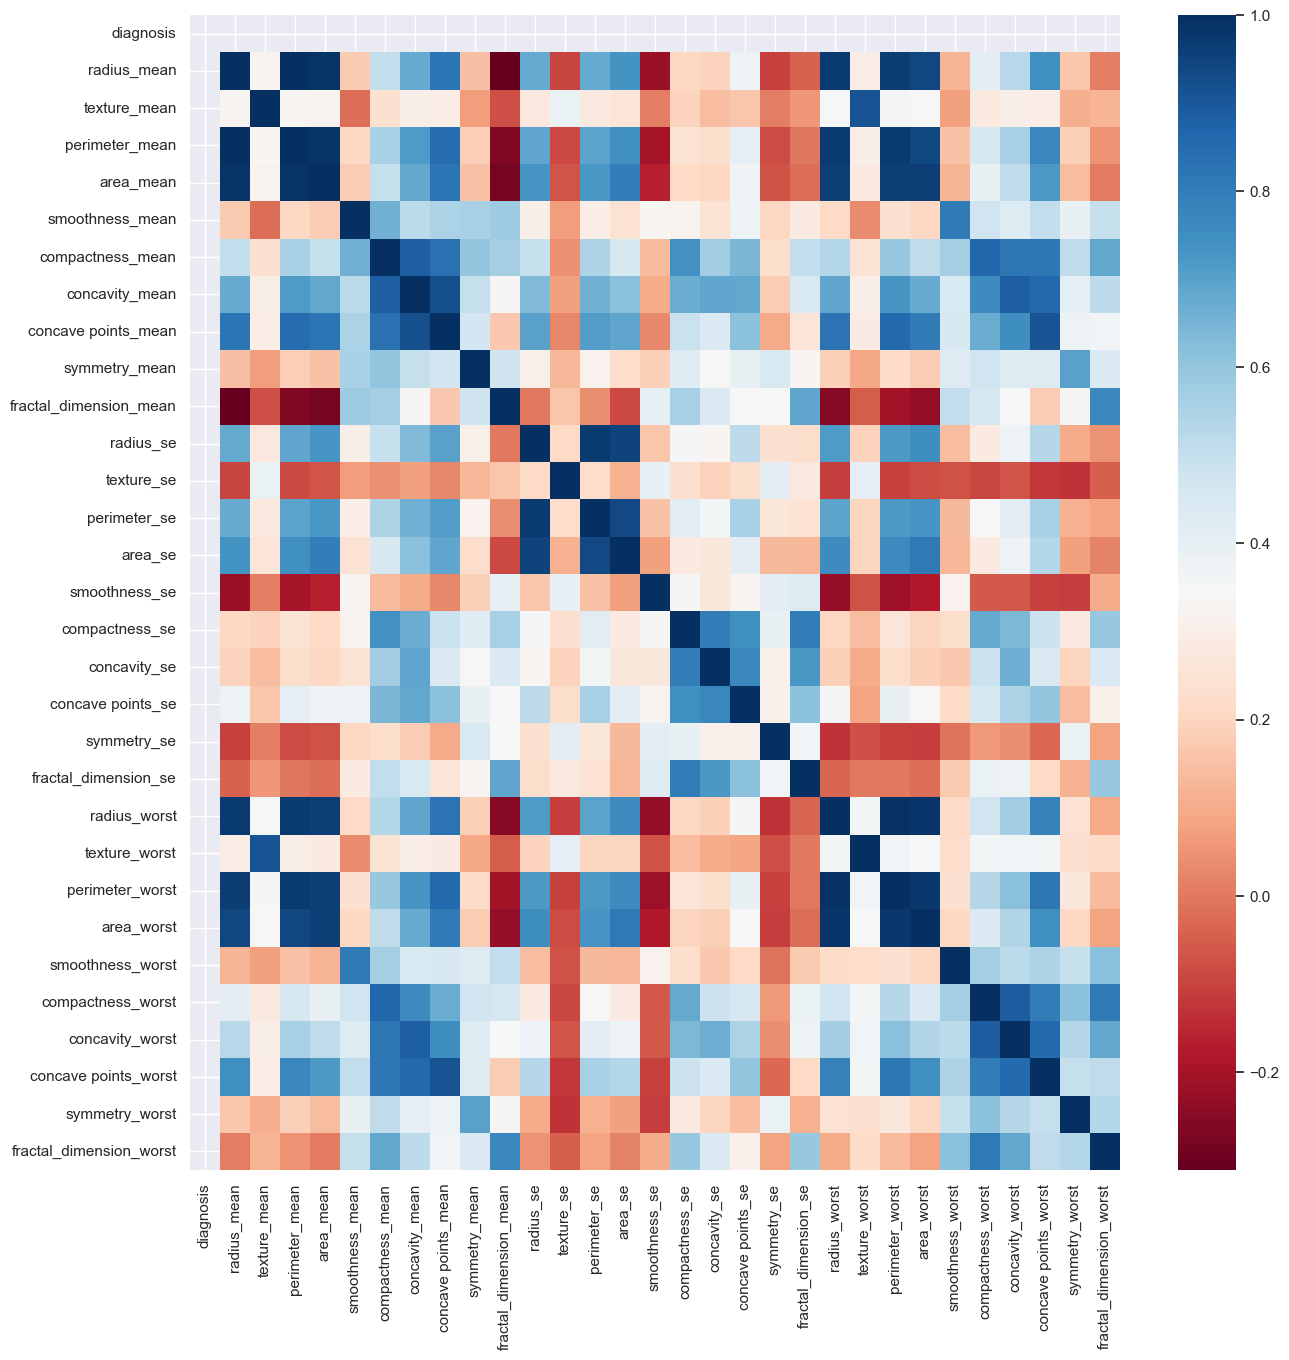

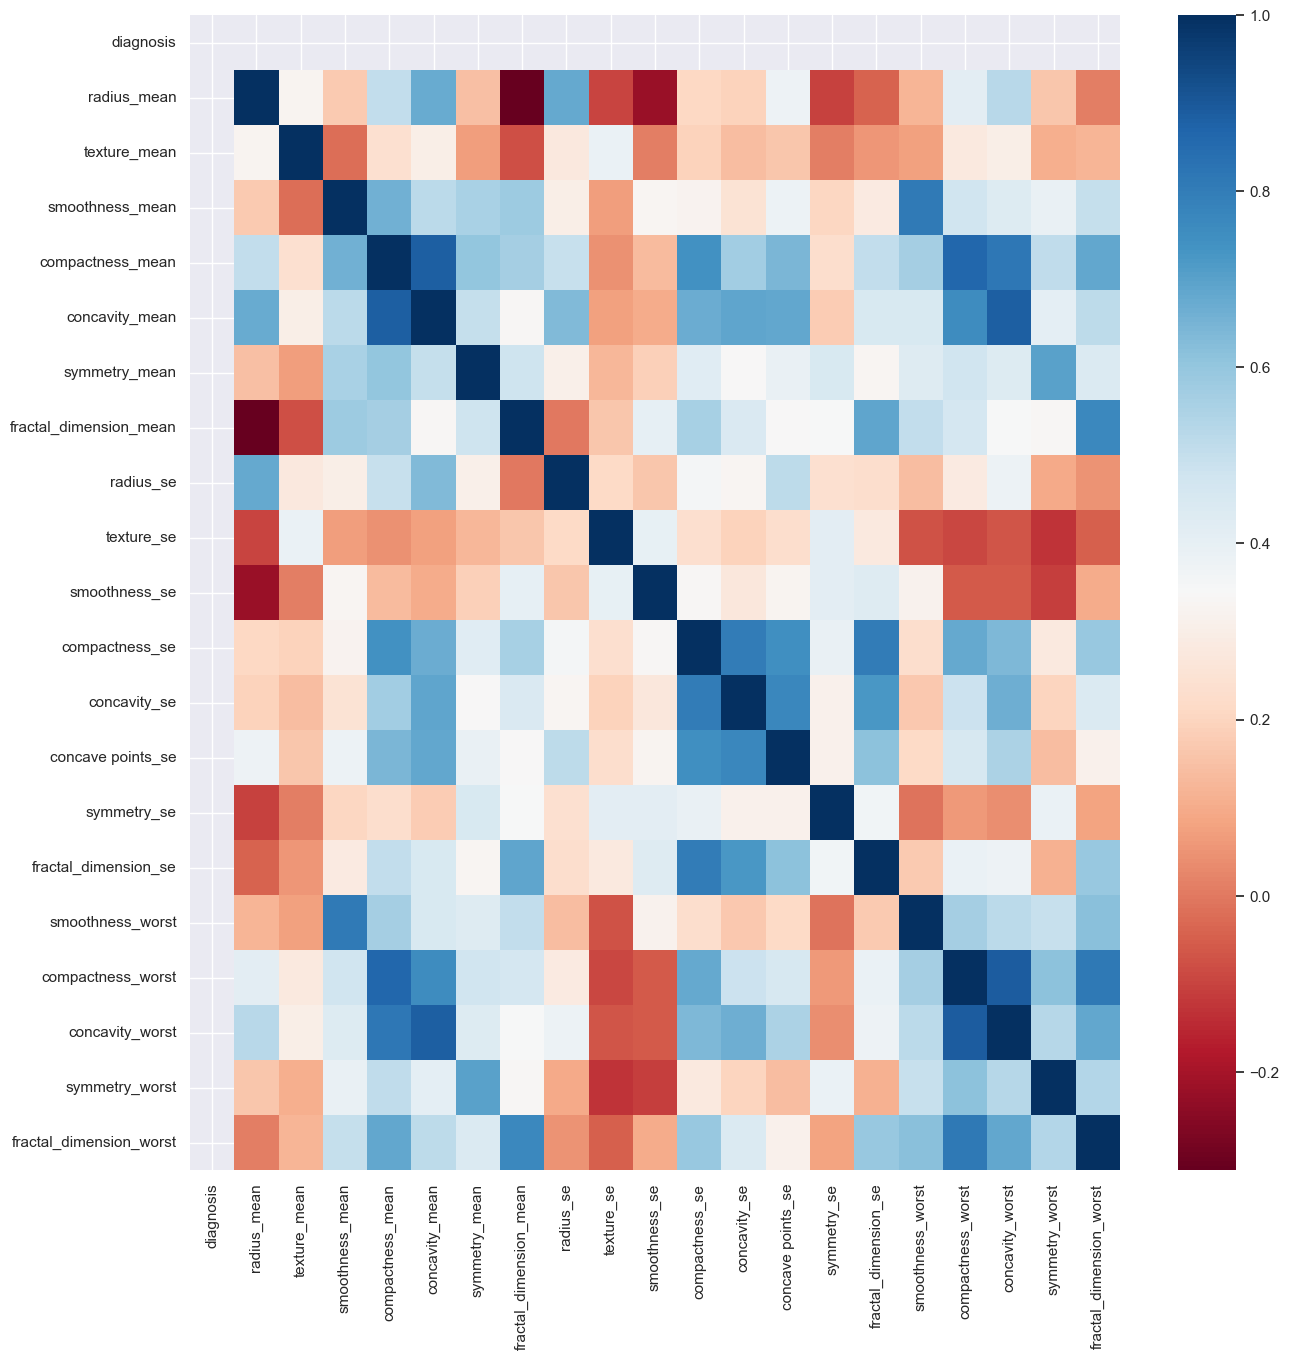

[]

In [58]:
# Fonksiyonu uygula, ısı haritasını çiz ve yüksek korelasyona sahip sütunları bul
drop_list = high_correlated_cols(df, plot=True)

# Yüksek korelasyona sahip sütunları düşür
df.drop(drop_list, axis=1)

# Yüksek korelasyona sahip sütunları düşürdükten sonra ısı haritasını çiz
high_correlated_cols(df.drop(drop_list, axis=1), plot=True)

Görebileceğimiz üzere ilk ısı haritasında çok yüksek korelasyonlu veriler varken, uygulanan işlem sonrasında ikinci ısı haritasında yüksek korelasyonlu verilerden kurtulduk.

**Yaklaşık 600 mb'lık 300'den fazla değişkenin olduğu bir veri setinde deneyelim.**

Aşağıda yer alan linkten veri setini indirebilirisiniz;

 https://www.kaggle.com/c/ieee-fraud-detection/data?select=train_transaction.csv
 

Bu veri setimizde 394 tane değişken var ve dolandırıcılık tespitinde kullanıldığı için değişkenlerin isimlerinin hepsi açıklanmamış. Bu kadar çok değişken ile çalışmak zor. Bu nedenle değişkenler üzerinden korelasyon analizi yaparak, birbiri ile neredeyse aynı olan değişkenleri veri setimizden çıkarırsak daha hızlı ve kolay işlem yapabiliriz.

In [59]:
# Kaggle'dan alınan büyük bir veri setini yükle
df = pd.read_csv("datasets/train_transaction.csv")
len(df.columns)
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

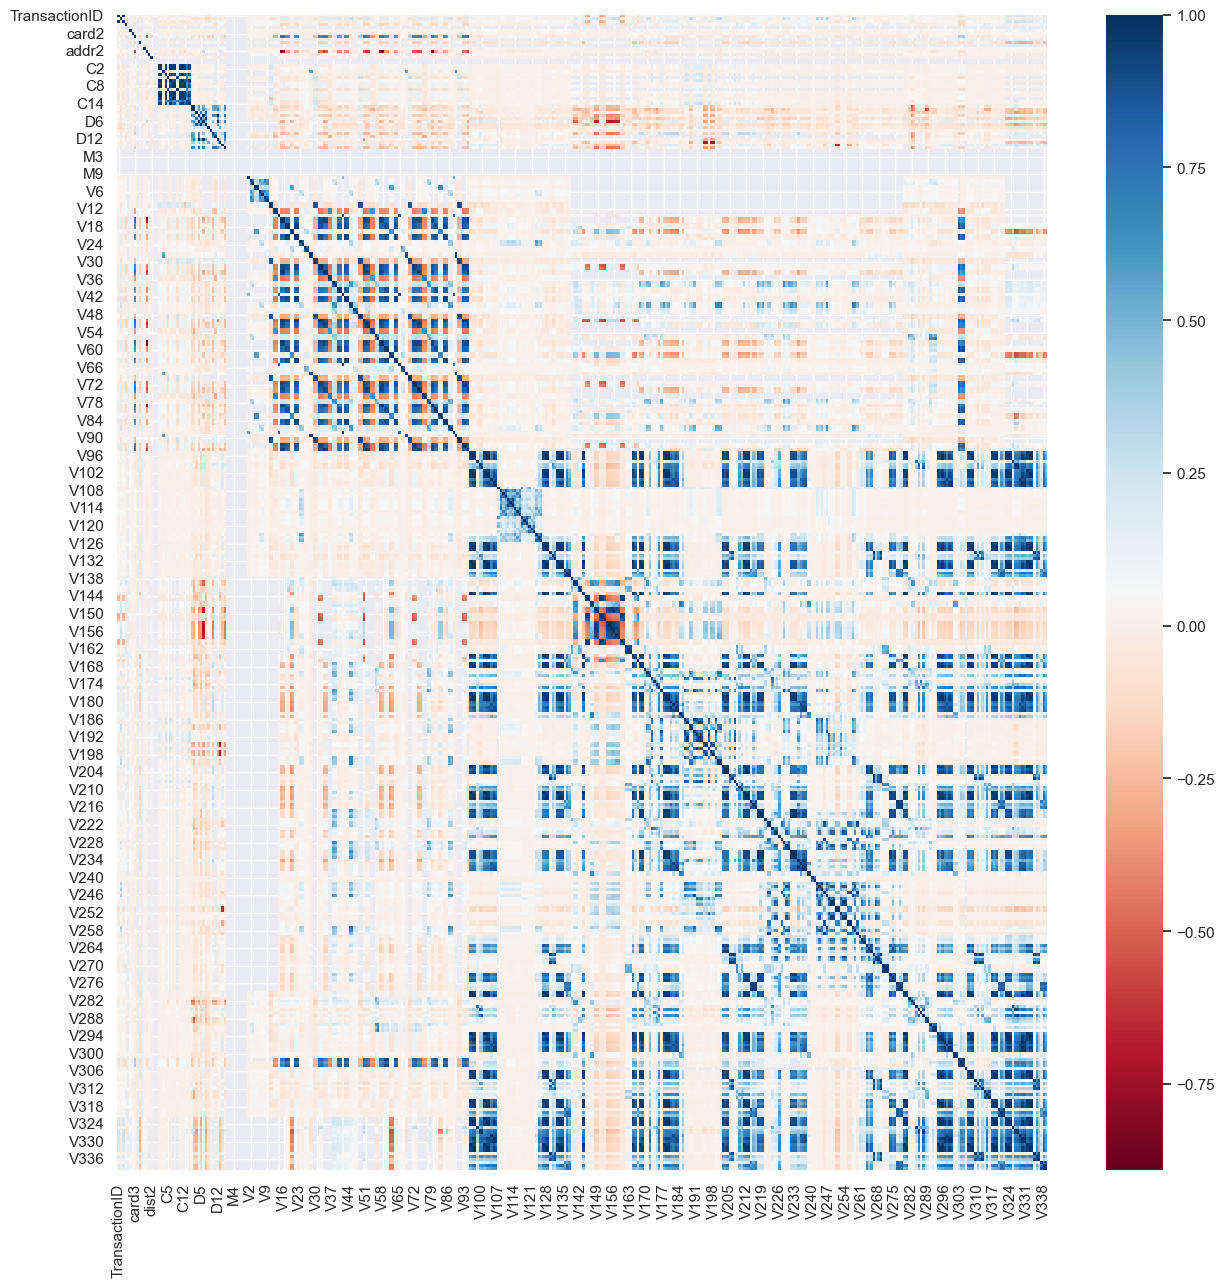

198

In [60]:
# Yüksek korelasyona sahip sütunları bul ve ısı haritasını çiz
drop_list = high_correlated_cols(df, plot=True)

# Yüksek korelasyona sahip sütunları düşürdükten sonra kaç sütun kaldığını kontrol et
len(df.drop(drop_list, axis=1).columns)

Değişkenler arasındaki korelasyondan yararlanarak 394 adet değişkenden 198 değişkene düşürebiliriz.